In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

# 数据预处理

In [5]:
# 加载数据
medals_df = pd.read_csv(r'D:/mcm2025/data/raw/summerOly_medal_counts.csv', encoding='ISO-8859-1')
hosts_df = pd.read_csv(r'D:/mcm2025/data/raw/summerOly_hosts.csv')
programs_df = pd.read_csv(r'D:/mcm2025/data/raw/summerOly_programs.csv', encoding='ISO-8859-1')
athletes_df = pd.read_csv(r'D:/mcm2025/data/raw/summerOly_athletes.csv', encoding='ISO-8859-1')

# 查看数据结构，确保正确加载
print(medals_df.head())
print(hosts_df.head())
print(programs_df.head())
print(athletes_df.head())


   Rank            NOC  Gold  Silver  Bronze  Total  Year
0     1  United States    11       7       2     20  1896
1     2         Greece    10      18      19     47  1896
2     3        Germany     6       5       2     13  1896
3     4         France     5       4       2     11  1896
4     5  Great Britain     2       3       2      7  1896
   Year                       Host
0  1896             Athens, Greece
1  1900              Paris, France
2  1904   St. Louis, United States
3  1908     London, United Kingdom
4  1912          Stockholm, Sweden
      Sport         Discipline Code Sports Governing Body 1896 1900 1904  \
0  Aquatics  Artistic Swimming  SWA        World Aquatics    0    0    0   
1  Aquatics             Diving  DIV        World Aquatics    0    0    2   
2  Aquatics  Marathon Swimming  OWS        World Aquatics    0    0    0   
3  Aquatics           Swimming  SWM        World Aquatics    4    7    9   
4  Aquatics         Water Polo  WPO        World Aquatics    0

In [6]:
# 检查缺失值
print(medals_df.isnull().sum())
print(hosts_df.isnull().sum())
print(programs_df.isnull().sum())
print(athletes_df.isnull().sum())

# 如果存在缺失值，根据情况填补或删除
medals_df.dropna(subset=['Gold', 'Silver', 'Bronze', 'Total'], inplace=True)
athletes_df.dropna(subset=['Name', 'Team', 'Medal'], inplace=True)


Rank      0
NOC       0
Gold      0
Silver    0
Bronze    0
Total     0
Year      0
dtype: int64
Year    0
Host    0
dtype: int64
Sport                    0
Discipline               2
Code                     0
Sports Governing Body    0
1896                     0
1900                     0
1904                     0
1906*                    0
1908                     0
1912                     0
1920                     0
1924                     0
1928                     2
1932                     2
1936                     2
1948                     2
1952                     2
1956                     2
1960                     2
1964                     2
1968                     2
1972                     2
1976                     2
1980                     2
1984                     2
1988                     3
1992                     2
1996                     2
2000                     2
2004                     2
2008                     2
2012                     2
2016  

In [7]:
# 将年份列转换为整数类型
medals_df['Year'] = medals_df['Year'].astype(int)
hosts_df['Year'] = hosts_df['Year'].astype(int)
athletes_df['Year'] = athletes_df['Year'].astype(int)

# 将奖牌数量转换为整数类型
medals_df['Gold'] = medals_df['Gold'].astype(int)
medals_df['Silver'] = medals_df['Silver'].astype(int)
medals_df['Bronze'] = medals_df['Bronze'].astype(int)
medals_df['Total'] = medals_df['Total'].astype(int)


In [8]:
# 合并奖牌数据和运动员数据
merged_df = pd.merge(athletes_df, medals_df, how='left', left_on=['NOC', 'Year'], right_on=['NOC', 'Year'])

# 检查合并后的数据
print(merged_df.head())


                    Name Sex            Team  NOC  Year         City  \
0              A Dijiang   M           China  CHN  1992    Barcelona   
1               A Lamusi   M           China  CHN  2012       London   
2            Gunnar Aaby   M         Denmark  DEN  1920    Antwerpen   
3            Edgar Aabye   M  Denmark/Sweden  DEN  1900        Paris   
4  Cornelia (-strannood)   F     Netherlands  NED  1932  Los Angeles   

        Sport                         Event     Medal  Rank  Gold  Silver  \
0  Basketball   Basketball Men's Basketball  No medal   NaN   NaN     NaN   
1        Judo  Judo Men's Extra-Lightweight  No medal   NaN   NaN     NaN   
2    Football       Football Men's Football  No medal   NaN   NaN     NaN   
3  Tug-Of-War   Tug-Of-War Men's Tug-Of-War      Gold   NaN   NaN     NaN   
4   Athletics  Athletics Women's 100 metres  No medal   NaN   NaN     NaN   

   Bronze  Total  
0     NaN    NaN  
1     NaN    NaN  
2     NaN    NaN  
3     NaN    NaN  
4     NaN

# 特征工程

### 这里！救救！不会了！

In [35]:
# 在hosts_df中为每个年份的主办国创建一个东道主标记
hosts_df['H'] = 1  # 主办国标记为1

# 在hosts_df中添加NOC列，以便将其与merged_df合并
# 从Host列中提取国家名称，并使用programs_df中的NOC列进行匹配
hosts_df['Country'] = hosts_df['Host'].str.extract(r'\((\w{3})\)')[0]

# 合并东道主信息
merged_df = pd.merge(merged_df, hosts_df[['NOC', 'Year', 'Host']], how='left', left_on=['NOC', 'Year'], right_on=['NOC', 'Year'])

# 如果没有主办国信息，则填充为0（不是东道主）
merged_df['Host'].fillna(0, inplace=True)

# 检查更新后的数据
print(merged_df.head())


KeyError: "None of [Index(['Year', 'NOC', 'Country'], dtype='object')] are in the [columns]"

In [10]:
# 为运动员创建一个新的列，表示奖牌类型
merged_df['Medal_Type'] = np.where(merged_df['Medal'] == 'Gold', 'Gold',
                                   np.where(merged_df['Medal'] == 'Silver', 'Silver',
                                            np.where(merged_df['Medal'] == 'Bronze', 'Bronze', 'No Medal')))

# 检查创建的奖牌类型列
print(merged_df[['Name', 'Medal_Type']].head())


                    Name Medal_Type
0              A Dijiang   No Medal
1               A Lamusi   No Medal
2            Gunnar Aaby   No Medal
3            Edgar Aabye       Gold
4  Cornelia (-strannood)   No Medal


In [11]:
# 计算国家的奖牌增速（例如金牌数量变化）
medals_df['Gold_Change'] = medals_df.groupby('NOC')['Gold'].pct_change()  # 使用百分比变化

# 如果是首次参加奥运会，设置增速为0
medals_df['Gold_Change'].fillna(0, inplace=True)

# 检查添加的增速特征
print(medals_df[['NOC', 'Year', 'Gold_Change']].head())


             NOC  Year  Gold_Change
0  United States  1896          0.0
1         Greece  1896          0.0
2        Germany  1896          0.0
3         France  1896          0.0
4  Great Britain  1896          0.0


In [12]:
# 保存清洗后的数据
merged_df.to_csv(r'D:/mcm2025/data/cleaned/cleaned_olympic_data.csv', index=False)


C:\Users\alanz\AppData\Local\Temp\ipykernel_21400\326999145.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gold', y='NOC', data=medals_2024_sorted, palette='viridis')


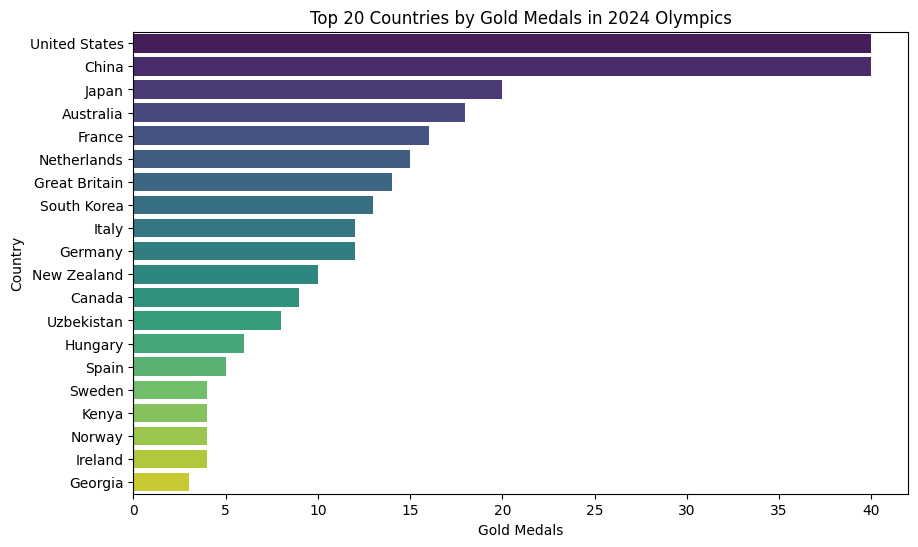

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设我们分析的是2024年奥运会金牌数量的排名
year = 2024
top_n = 20  # 显示排名前20的国家

# 筛选数据
medals_2024 = medals_df[medals_df['Year'] == year]
medals_2024_sorted = medals_2024.sort_values(by='Gold', ascending=False).head(top_n)

# 绘制条形图
plt.figure(figsize=(10, 6))
sns.barplot(x='Gold', y='NOC', data=medals_2024_sorted, palette='viridis')
plt.title(f'Top {top_n} Countries by Gold Medals in {year} Olympics')
plt.xlabel('Gold Medals')
plt.ylabel('Country')
plt.show()


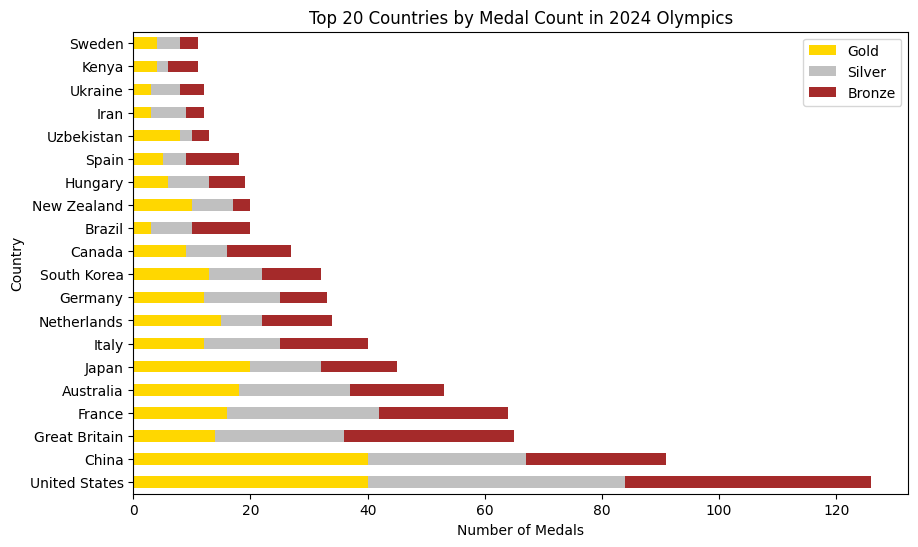

In [14]:
# 假设我们分析的是2024年奥运会的奖牌分布
medals_2024 = medals_df[medals_df['Year'] == 2024]
medals_2024_sorted = medals_2024.sort_values(by='Total', ascending=False).head(top_n)

# 堆叠条形图，显示金、银、铜奖牌比例
fig, ax = plt.subplots(figsize=(10, 6))
medals_2024_sorted.set_index('NOC')[['Gold', 'Silver', 'Bronze']].plot(kind='barh', stacked=True, ax=ax, color=['gold', 'silver', 'brown'])
plt.title(f'Top {top_n} Countries by Medal Count in {year} Olympics')
plt.xlabel('Number of Medals')
plt.ylabel('Country')
plt.show()


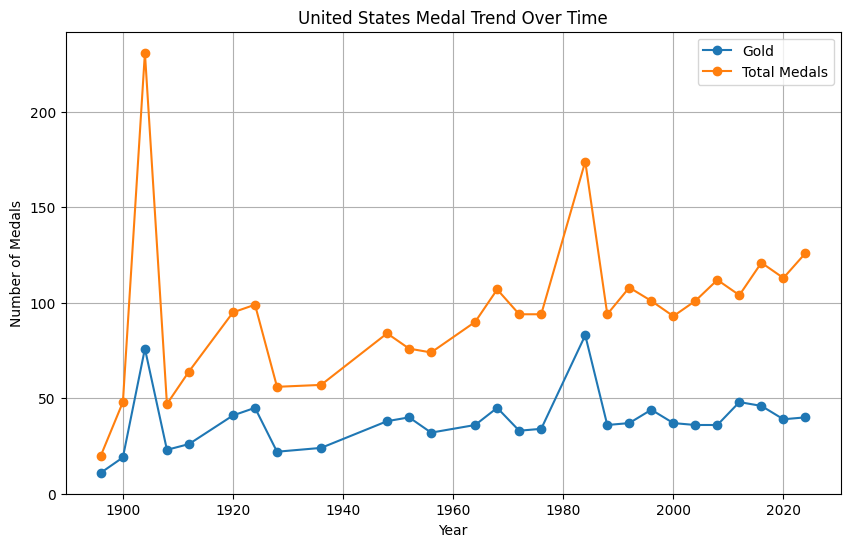

In [15]:
# 假设我们分析的是某个国家（例如美国）的奖牌数量变化趋势
country = 'United States'

# 筛选数据
usa_medals = medals_df[medals_df['NOC'] == country]

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(usa_medals['Year'], usa_medals['Gold'], label='Gold', marker='o')
plt.plot(usa_medals['Year'], usa_medals['Total'], label='Total Medals', marker='o')
plt.title(f'{country} Medal Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend()
plt.grid(True)
plt.show()


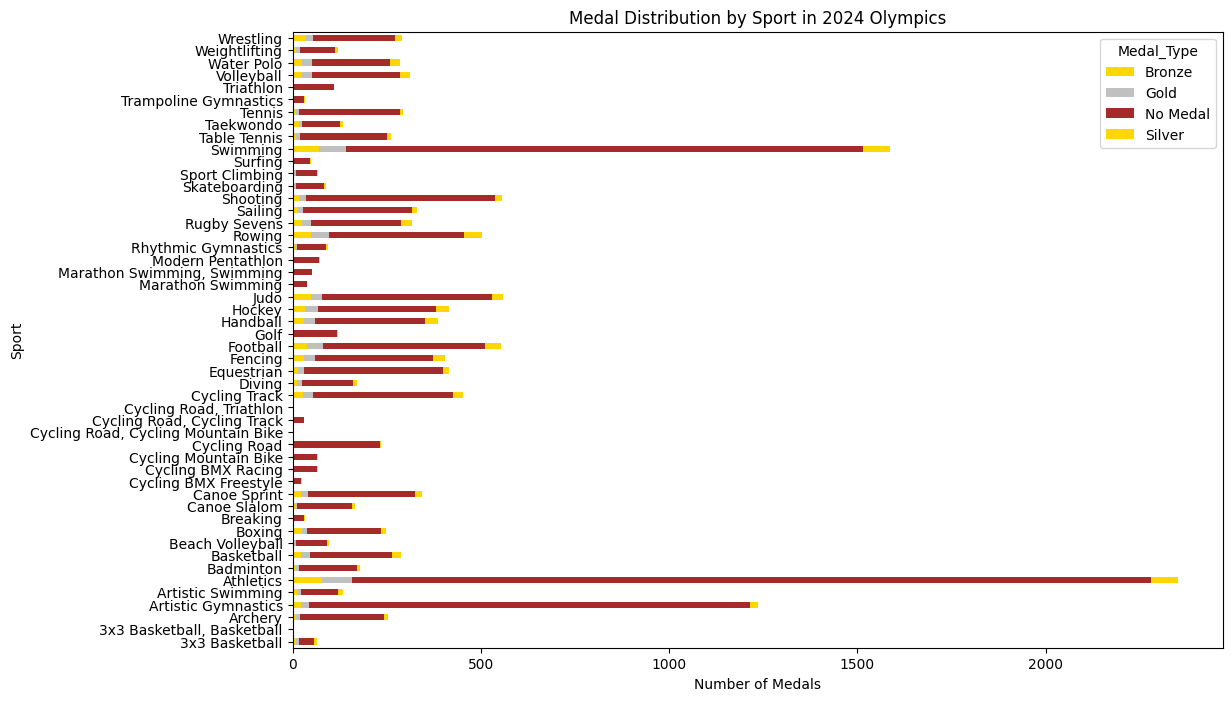

In [16]:
# 假设我们分析的是2024年奥运会的不同项目奖牌分布
year = 2024
projects = merged_df[merged_df['Year'] == year]

# 按照项目和奖牌类型进行汇总
project_medals = projects.groupby(['Sport', 'Medal_Type']).size().unstack(fill_value=0)

# 绘制堆叠条形图
project_medals.plot(kind='barh', stacked=True, figsize=(12, 8), color=['gold', 'silver', 'brown'])
plt.title(f'Medal Distribution by Sport in {year} Olympics')
plt.xlabel('Number of Medals')
plt.ylabel('Sport')
plt.show()


C:\Users\alanz\AppData\Local\Temp\ipykernel_21400\2352914429.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_increment_countries.index, y=top_increment_countries['Gold_Increment'], palette='coolwarm')


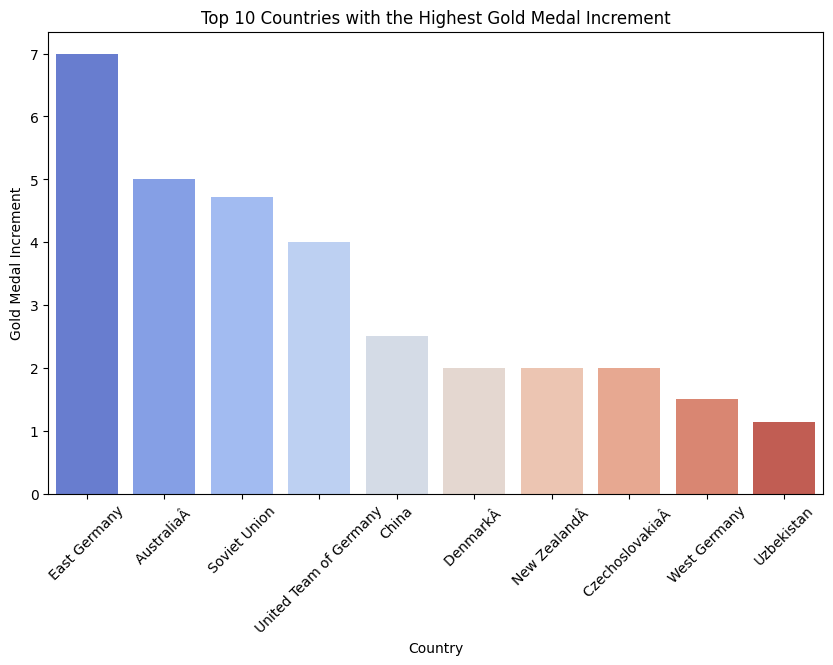

In [17]:
# 计算每个国家金牌的增量（即每届奥运会金牌数的差值）
medals_df['Gold_Increment'] = medals_df.groupby('NOC')['Gold'].diff()

# 按照增量排序，并展示前10名
top_increment_countries = medals_df.groupby('NOC').agg({'Gold_Increment': 'mean'}).sort_values(by='Gold_Increment', ascending=False).head(10)

# 绘制柱状图
plt.figure(figsize=(10, 6))
sns.barplot(x=top_increment_countries.index, y=top_increment_countries['Gold_Increment'], palette='coolwarm')
plt.title('Top 10 Countries with the Highest Gold Medal Increment')
plt.xlabel('Country')
plt.ylabel('Gold Medal Increment')
plt.xticks(rotation=45)
plt.show()


# 构建模型

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# 将'Gold'作为目标变量（即我们要预测的变量）
# 基本特征：奖牌数量、金牌增量、是否是东道主等

# 选择特征和目标变量
features = merged_df[['Year', 'Gold', 'Silver', 'Bronze', 'Total', 'Host']]
target = merged_df['Gold']  # 目标变量：金牌数

# 处理年份数据，转换成数值
features['Year'] = features['Year'].astype(int)

# 填充缺失值
features.fillna(0, inplace=True)
target.fillna(0, inplace=True)

# 数据标准化
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 将数据划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)


C:\Users\alanz\AppData\Local\Temp\ipykernel_21400\2945439691.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Year'] = features['Year'].astype(int)
C:\Users\alanz\AppData\Local\Temp\ipykernel_21400\2945439691.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(0, inplace=True)


In [29]:
# 初始化线性回归模型
lr_model = LinearRegression()

# 训练模型
lr_model.fit(X_train, y_train)

# 预测测试集
y_pred_lr = lr_model.predict(X_test)

# 创建实际值和预测值的DataFrame
predicted_gold_linear = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})

# 随机从测试集中挑出一年的数据
random_year = np.random.choice(X_test[:, 0].astype(int))
actual_vs_predicted = predicted_gold_linear.loc[y_test.index[X_test[:, 0] == random_year]]

print(f"\nActual vs Predicted Gold Medals for the year {random_year} (Linear Regression):")
print(actual_vs_predicted)

# 评估模型
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression Model:')
print(f'Mean Squared Error: {mse_lr}')
print(f'Mean Absolute Error: {mae_lr}')
print(f'R2 Score: {r2_lr}')



Actual vs Predicted Gold Medals for the year 1 (Linear Regression):
Empty DataFrame
Columns: [Actual, Predicted]
Index: []
Linear Regression Model:
Mean Squared Error: 9.054254898095316e-30
Mean Absolute Error: 2.7409361720733846e-15
R2 Score: 1.0
